# 1 - Leitura e análise de dados

In [14]:
# importação das bibliotecas 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

In [15]:
# Leitura da base de dados
df = pd.read_csv('notebooks.csv')

In [16]:
df.dtypes

marca                object
ano                   int64
qtd_nucleos           int64
qtd_threads           int64
ram                   int64
gpu_dedicada         object
ram_gpu               int64
entradas_usb          int64
duracao_bateria       int64
resolucao_tela       object
tipo_tela            object
tela_touch           object
armazenamento_hdd     int64
armazenamento_ssd     int64
segmento             object
valor                 int64
dtype: object

In [17]:
# Exibe informações da quantidade de valores núlos e tipo de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marca              50000 non-null  object
 1   ano                50000 non-null  int64 
 2   qtd_nucleos        50000 non-null  int64 
 3   qtd_threads        50000 non-null  int64 
 4   ram                50000 non-null  int64 
 5   gpu_dedicada       50000 non-null  object
 6   ram_gpu            50000 non-null  int64 
 7   entradas_usb       50000 non-null  int64 
 8   duracao_bateria    50000 non-null  int64 
 9   resolucao_tela     50000 non-null  object
 10  tipo_tela          50000 non-null  object
 11  tela_touch         50000 non-null  object
 12  armazenamento_hdd  50000 non-null  int64 
 13  armazenamento_ssd  50000 non-null  int64 
 14  segmento           50000 non-null  object
 15  valor              50000 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 6.

In [18]:
# Exibe informações descritivas das colunas numéricas
df.describe()

,ano,qtd_nucleos,qtd_threads,ram,ram_gpu,entradas_usb,duracao_bateria,armazenamento_hdd,armazenamento_ssd,valor
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2016.480620,7.330480,11.006360,13.679560,1.224760,2.615240,345.445820,334.080000,610.287500,15233.142220
std,4.033315,2.931633,5.087667,10.504746,2.344456,0.882981,192.055706,577.087267,645.129583,6089.487725
min,2010.000000,2.000000,2.000000,2.000000,0.000000,1.000000,30.000000,0.000000,0.000000,2522.000000
25%,2013.000000,4.000000,7.000000,8.000000,0.000000,2.000000,149.000000,0.000000,250.000000,9772.000000
50%,2017.000000,8.000000,10.000000,12.000000,0.000000,3.000000,418.000000,0.000000,250.000000,16001.000000
75%,2020.000000,10.000000,14.000000,16.000000,0.000000,3.000000,522.000000,500.000000,1000.000000,20140.250000
max,2023.000000,12.000000,24.000000,64.000000,12.000000,4.000000,600.000000,2000.000000,2000.000000,28442.000000


In [19]:
# Exibe informações descritivas das colunas textuais
df.describe(include='O')

,marca,gpu_dedicada,resolucao_tela,tipo_tela,tela_touch,segmento
count,50000,50000,50000,50000,50000,50000
unique,11,2,4,5,2,8
top,xiaomi,não,FULLHD,OLED,não,premium
freq,4676,37804,20821,15160,45811,19052


In [20]:
# Exibe a quantidade de valores núlos 
df.isna().sum()

marca                0
ano                  0
qtd_nucleos          0
qtd_threads          0
ram                  0
gpu_dedicada         0
ram_gpu              0
entradas_usb         0
duracao_bateria      0
resolucao_tela       0
tipo_tela            0
tela_touch           0
armazenamento_hdd    0
armazenamento_ssd    0
segmento             0
valor                0
dtype: int64

# 2 - Tratar dados

In [21]:
# Lista as colunas de valores textuais
df.select_dtypes(include='object').columns.tolist()

['marca',
 'gpu_dedicada',
 'resolucao_tela',
 'tipo_tela',
 'tela_touch',
 'segmento']

In [22]:
# Exibe os valores únicos da coluna marca
df.marca.unique()

array(['positivo', 'lenovo', 'asus', 'hp', 'huawei', 'dell', 'apple',
       'acer', 'xiaomi', 'samsung', 'razer'], dtype=object)

In [23]:
# Altera a coluna marca para valores numéricos
le = LabelEncoder()
df['marca'] = le.fit_transform(df['marca'])

In [24]:
# Para verificar os valores únicos na coluna gpu_dedicada
df.gpu_dedicada.unique()

array(['não', 'sim'], dtype=object)

In [25]:
# Transformar coluna gpu_dedicada em numérica
df.loc[df['gpu_dedicada'] == 'não', 'gpu_dedicada'] = 0
df.loc[df['gpu_dedicada'] == 'sim', 'gpu_dedicada'] = 1

df['gpu_dedicada'] = pd.to_numeric(df['gpu_dedicada'])

In [26]:
df.tipo_tela.value_counts()

OLED      15160
AMOLED    13326
IPS        9867
TN         7775
VA         3872
Name: tipo_tela, dtype: int64

In [27]:
# Transformar coluna tipo_tela em numérica
df.loc[df['tipo_tela'] == 'TN', 'tipo_tela'] = 0
df.loc[df['tipo_tela'] == 'IPS', 'tipo_tela'] = 1
df.loc[df['tipo_tela'] == 'VA', 'tipo_tela'] = 2
df.loc[df['tipo_tela'] == 'OLED', 'tipo_tela'] = 3
df.loc[df['tipo_tela'] == 'AMOLED', 'tipo_tela'] = 4

df['tipo_tela'] = pd.to_numeric(df['tipo_tela'])

In [28]:
# Exibe os valores únicos da coluna tela_touch
df.tela_touch.unique()

array(['não', 'sim'], dtype=object)

In [29]:
# Transformar coluna tela_touch em numérica
df.loc[df['tela_touch'] == 'não', 'tela_touch'] = 0
df.loc[df['tela_touch'] == 'sim', 'tela_touch'] = 1

df['tela_touch'] = pd.to_numeric(df['tela_touch'])

In [30]:
# Exibe os valores únicos da coluna segmento
df.segmento.unique()

array(['entrada', '2em1', 'intermediario', 'ultraportatil', 'premium',
       'jogos_entrada', 'jogos_premium', 'jogos_intermediarios'],
      dtype=object)

In [31]:
df.loc[df['segmento'] == 'entrada', 'segmento'] = 0
df.loc[df['segmento'] == 'intermediario', 'segmento'] = 1
df.loc[df['segmento'] == 'jogos_entrada', 'segmento'] = 2
df.loc[df['segmento'] == '2em1', 'segmento'] = 3
df.loc[df['segmento'] == 'jogos_intermediarios', 'segmento'] = 4
df.loc[df['segmento'] == 'ultraportatil', 'segmento'] = 5
df.loc[df['segmento'] == 'premium', 'segmento'] = 6
df.loc[df['segmento'] == 'jogos_premium', 'segmento'] = 7

df['segmento'] = pd.to_numeric(df['segmento'])

In [32]:
df.resolucao_tela.unique()

array(['HD', 'FULLHD', 'QUADHD', '4K'], dtype=object)

In [33]:
df.loc[df['resolucao_tela'] == 'HD', 'resolucao_tela'] = 0
df.loc[df['resolucao_tela'] == 'FULLHD', 'resolucao_tela'] = 1
df.loc[df['resolucao_tela'] == 'QUADHD', 'resolucao_tela'] = 2
df.loc[df['resolucao_tela'] == '4K', 'resolucao_tela'] = 3

df['resolucao_tela'] = pd.to_numeric(df['resolucao_tela'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   marca              50000 non-null  int64
 1   ano                50000 non-null  int64
 2   qtd_nucleos        50000 non-null  int64
 3   qtd_threads        50000 non-null  int64
 4   ram                50000 non-null  int64
 5   gpu_dedicada       50000 non-null  int64
 6   ram_gpu            50000 non-null  int64
 7   entradas_usb       50000 non-null  int64
 8   duracao_bateria    50000 non-null  int64
 9   resolucao_tela     50000 non-null  int64
 10  tipo_tela          50000 non-null  int64
 11  tela_touch         50000 non-null  int64
 12  armazenamento_hdd  50000 non-null  int64
 13  armazenamento_ssd  50000 non-null  int64
 14  segmento           50000 non-null  int64
 15  valor              50000 non-null  int64
dtypes: int64(16)
memory usage: 6.1 MB


In [36]:
# Separar os dados em X e y
X = df.drop('valor', axis = 1)
y = df[['valor']]

In [37]:
# Normalizaros dados
from sklearn.preprocessing import MinMaxScaler

scaler_features = MinMaxScaler()
scaler_features.fit(X)
X = scaler_features.transform(X)

scaler_target = MinMaxScaler()
scaler_target.fit(y)
y = scaler_target.transform(y)

In [38]:
# Separa os dados em treinamento e teste com 0.2% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=19)

# 3 - Treinamento de uma rede neural para regressão



In [39]:
# Criar uma instância do modelo de rede neural
model = Sequential()
model.add(InputLayer(input_shape=(X.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

# compila o modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# treina o modelo
history = model.fit(X_train, y_train, epochs=50, verbose = 1, validation_split = 0.3)

Epoch 1/50
1092/1092 [==============================] - 4s 3ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 2/50
1092/1092 [==============================] - 4s 3ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 3/50
1092/1092 [==============================] - 3s 3ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 4/50
1092/1092 [==============================] - 3s 3ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 5/50
1092/1092 [==============================] - 3s 3ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 6/50
1092/1092 [==============================] - 4s 4ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 7/50
1092/1092 [==============================] - 3s 3ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 8/50
1092/1092 [==============================] - 3s 3ms

# 4 - Erro médio quadrático (MSE)



In [42]:
# Previsão de dados de X_teste com o modelo treinado
predict = model.predict(X_test)

# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scaler_target.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_target.inverse_transform(predict)

# Calculo do mse com a biblioteca do sklearn
mse = mean_squared_error(y_test_desnormalizado, predict_desnormalizado)
print("Mean squared error Regressão Linear: ", mse)


4/4 [==============================] - 0s 3ms/step
Mean squared error Regressão Linear:  4169641.7819123776


# 5 - Gráfico com os valores reais e preditos pelo modelo**

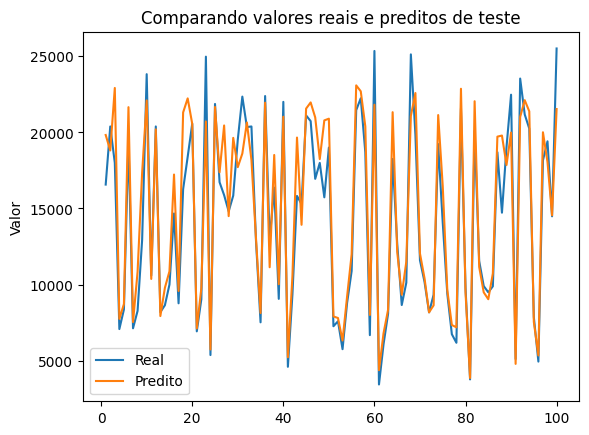

In [43]:
grafico_x = [x for x in range(1,len(y_test_desnormalizado)+1)]

plt.plot(grafico_x, y_test_desnormalizado, label='Real')
plt.plot(grafico_x, predict_desnormalizado, label='Predito')

plt.title('Comparando valores reais e preditos de teste')
plt.legend()

plt.ylabel('Valor')

plt.show()

# 6 - Gráfico com o loss de treinamento e validação

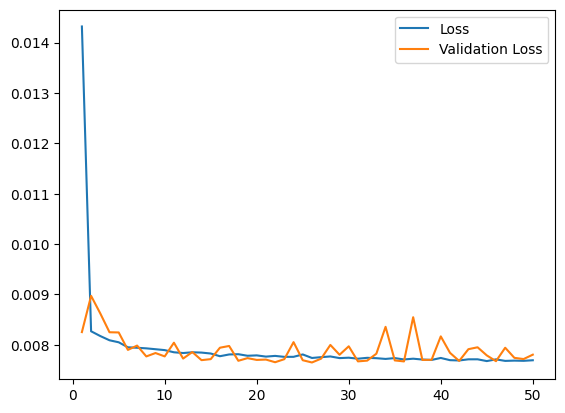

In [44]:
loss_history = history.history['loss']
val_loss_history = history.history['val_loss'] 

# Definimos os valores do eixo x (as épocas)
x = [y+1 for y in range(0,len(loss_history))]

plt.plot(x, loss_history, label = "Loss")
plt.plot(x, val_loss_history, label = "Validation Loss")
plt.legend()
plt.show()

# 6 - Leitura e análise da base de dados

In [45]:
# Importação do Pandas
import pandas as pd

In [46]:
# Leitura da base de dados
df = pd.read_csv('notebooks_nulos.csv')

In [47]:
df.dtypes

marca                 object
ano                  float64
qtd_nucleos            int64
qtd_threads            int64
ram                    int64
gpu_dedicada          object
ram_gpu                int64
entradas_usb           int64
duracao_bateria      float64
resolucao_tela        object
tipo_tela             object
tela_touch            object
armazenamento_hdd      int64
armazenamento_ssd      int64
segmento              object
dtype: object

In [48]:
# Exibe porcentagem de valores nulos por coluna
df.isna().sum() * 100 / len(df)

marca                 0.700
ano                   9.506
qtd_nucleos           0.000
qtd_threads           0.000
ram                   0.000
gpu_dedicada          0.000
ram_gpu               0.000
entradas_usb          0.000
duracao_bateria       6.798
resolucao_tela        0.000
tipo_tela             0.000
tela_touch           55.096
armazenamento_hdd     0.000
armazenamento_ssd     0.000
segmento              0.000
dtype: float64

In [49]:
# Remove a coluna tela_touch que possui mais de 50% de valores núlos
df.drop('tela_touch', axis = 1, inplace = True)

In [50]:
# Remove as linhas com valores núlos na coluna marca (menos de 1% de valores núlos)
df = df.loc[~df['marca'].isna()]

In [51]:
df.isna().sum() * 100 / len(df)

marca                0.000000
ano                  9.474320
qtd_nucleos          0.000000
qtd_threads          0.000000
ram                  0.000000
gpu_dedicada         0.000000
ram_gpu              0.000000
entradas_usb         0.000000
duracao_bateria      6.805639
resolucao_tela       0.000000
tipo_tela            0.000000
armazenamento_hdd    0.000000
armazenamento_ssd    0.000000
segmento             0.000000
dtype: float64

In [52]:
# Cria um loop para percorrer as colunas
for col in df.columns:
    # Caso a coluna possua valores núlos, irá acrescentar a moda da coluna nos valores nulos
    if df[col].isna().sum() > 0:
        df.loc[df[col].isna(), col] = df[col].mode()[0]

In [53]:
df.isna().sum()

marca                0
ano                  0
qtd_nucleos          0
qtd_threads          0
ram                  0
gpu_dedicada         0
ram_gpu              0
entradas_usb         0
duracao_bateria      0
resolucao_tela       0
tipo_tela            0
armazenamento_hdd    0
armazenamento_ssd    0
segmento             0
dtype: int64

In [54]:
# Lista com colunas do tipo object
colunas_object  = df.select_dtypes(include='object').columns.tolist()
colunas_object

['marca', 'gpu_dedicada', 'resolucao_tela', 'tipo_tela', 'segmento']

In [55]:
from sklearn.preprocessing import LabelEncoder
# Converter valores textuais para numéricos
for coluna in colunas_object:
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              49650 non-null  int64  
 1   ano                49650 non-null  float64
 2   qtd_nucleos        49650 non-null  int64  
 3   qtd_threads        49650 non-null  int64  
 4   ram                49650 non-null  int64  
 5   gpu_dedicada       49650 non-null  int64  
 6   ram_gpu            49650 non-null  int64  
 7   entradas_usb       49650 non-null  int64  
 8   duracao_bateria    49650 non-null  float64
 9   resolucao_tela     49650 non-null  int64  
 10  tipo_tela          49650 non-null  int64  
 11  armazenamento_hdd  49650 non-null  int64  
 12  armazenamento_ssd  49650 non-null  int64  
 13  segmento           49650 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 5.7 MB


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical

# Define valores de X
X = df.drop('segmento', axis = 1)

# Normaliza os valores de X
scaler_features = MinMaxScaler()
scaler_features.fit(X)
X = scaler_features.transform(X)

# Define os valores de y
y = df.segmento.values
# converte y para one-hot-encoded
y = to_categorical(y)

# Separa X e y em treinamnto e teste com 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 7 - Treinamento de uma rede neural para classificação

In [58]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [59]:
# Quantidade de classes que queremos prever
y.shape[1]

8

In [61]:
model = Sequential()
# No input_shape, a quantidade de atributos que possuimos
model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='relu'))
# Na camada de saida de uma classificação, usamos 1 neurônio para cada classe possível e softmax
model.add(Dense(y.shape[1], activation='softmax'))
# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1056/1056 [==============================] - 7s 5ms/step - loss: 0.5710 - accuracy: 0.7683 - val_loss: 0.3267 - val_accuracy: 0.8474
Epoch 2/50
1056/1056 [==============================] - 4s 4ms/step - loss: 0.2858 - accuracy: 0.8713 - val_loss: 0.2695 - val_accuracy: 0.8765
Epoch 3/50
1056/1056 [==============================] - 4s 4ms/step - loss: 0.2470 - accuracy: 0.8930 - val_loss: 0.2425 - val_accuracy: 0.8907
Epoch 4/50
1056/1056 [==============================] - 5s 5ms/step - loss: 0.2253 - accuracy: 0.9056 - val_loss: 0.2264 - val_accuracy: 0.9032
Epoch 5/50
1056/1056 [==============================] - 4s 4ms/step - loss: 0.2142 - accuracy: 0.9108 - val_loss: 0.2067 - val_accuracy: 0.9132
Epoch 6/50
1056/1056 [==============================] - 4s 4ms/step - loss: 0.2000 - accuracy: 0.9181 - val_loss: 0.2150 - val_accuracy: 0.9077
Epoch 7/50
1056/1056 [==============================] - 5s 5ms/step - loss: 0.1958 - accuracy: 0.9204 - val_loss: 0.2005 - val_accuracy:

# 8 - Acurácia do modelo.

In [62]:
# calcular a acurácia
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia: {accuracy}")

311/311 [==============================] - 1s 2ms/step - loss: 0.1225 - accuracy: 0.9405
Acurácia: 0.9404833912849426


# 9 - Matriz de confusão.

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# fazer previsões com o modelo
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

311/311 [==============================] - 1s 2ms/step


In [64]:
y_pred = le.inverse_transform(y_pred)
y_test = le.inverse_transform(y_test)

In [65]:
# Lista das possíveis classes
le.classes_

array(['2em1', 'entrada', 'intermediario', 'jogos_entrada',
       'jogos_intermediarios', 'jogos_premium', 'premium',
       'ultraportatil'], dtype=object)

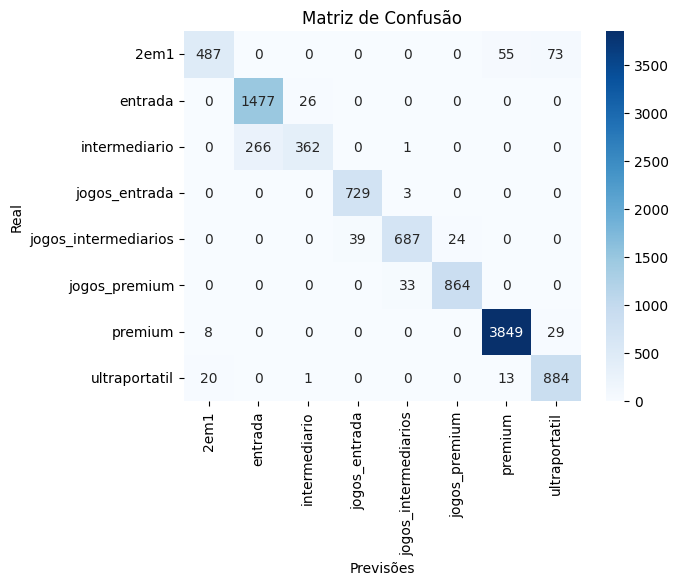

In [67]:
# Definir nomes de classe
classes_names = le.classes_

# Mapear classes reais e previstas para os nomes de classe
cm = confusion_matrix(y_test, y_pred, labels=classes_names)

# Plotar o heatmap com os nomes das classes
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes_names, yticklabels=classes_names)
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.show()


# 10 - Gráfico com os dados do treinamento.
- loss;
- val_loss;
- accuracy;
- val_accuracy;

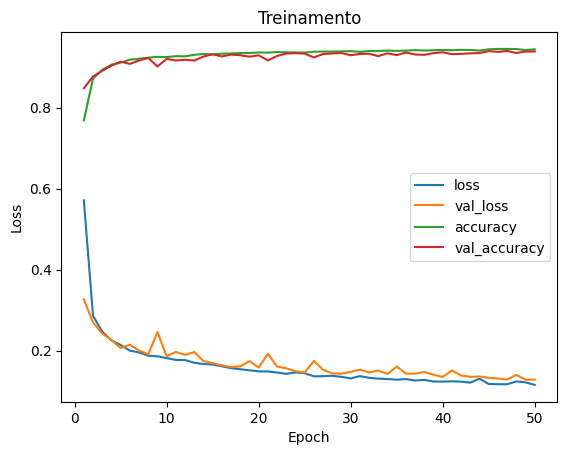

In [68]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']  
accuracy = history.history['accuracy']  
val_accuracy = history.history['val_accuracy']  

grafico_x = [x for x in range(1,len(val_accuracy)+1)]

plt.plot(grafico_x, loss, label='loss')
plt.plot(grafico_x, val_loss, label='val_loss')
plt.plot(grafico_x, accuracy, label='accuracy')
plt.plot(grafico_x, val_accuracy, label='val_accuracy')

plt.title('Treinamento')
plt.legend()

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()